Проведемо аналіз статистики гравців за два останні роки до пандемії і спробуємо відповісти на запитання, чи змінився підхід до футболу за один рік, які гравці найрезультативніші, які гравці мають найкраще співвідношення очікуваних голів до забитих за 2019 рік, подивимося, скільки голів забивав Ліонель Мессі та порівняємо його із Криштіано Роналду.

Спробуємо визначити, який гравець мав найкращу статистику в 2018 році

# 1. Підключення бібліотек та ознайомлення з даними

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [36]:
df = pd.read_csv('Data.csv')

In [37]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [38]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [39]:
df.shape

(660, 15)

# 2. Аналіз даних

Порівняємо розподіли величин та попарні залежності за 2018 та 2019 роки

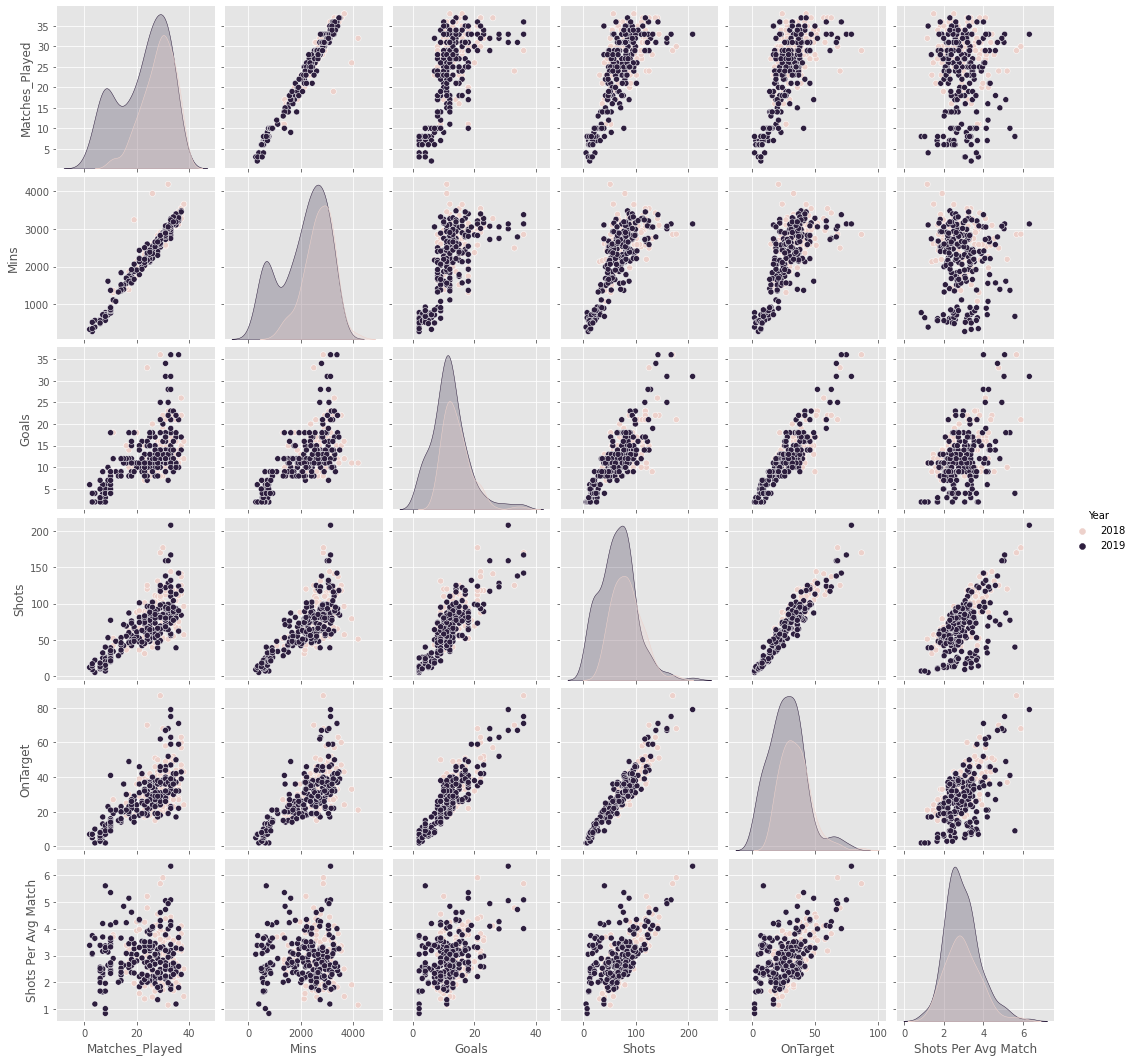

In [40]:
df1 = df[(df.Year == 2018)| (df.Year == 2019)]


sns.pairplot(df1[['Matches_Played', 'Mins', 'Goals', 'Shots', 'OnTarget', 'Shots Per Avg Match', "Year"]], hue="Year")

Як видно, в попарних залежностях суттєвих змін тренду немає, але наявні цікаві зміни гістаграм кількості зіграних матчів, кількості хвилин на полі та кількості голів.

В 2019 році з'являється ще один пік, який можна пояснити зміною підходу до гри, а саме використання резервного складу для покращення фізичної стабільності основного складу протягом всього сезону.

Також помітно, що на розподілах голів та ударів починає утворюватися пік, який більший на гістаграмі ударів. Можна припустити, що гравці заміни мають гіршу реалізацію.

xG гравців, які забили найбільше голів за 2019 рік

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


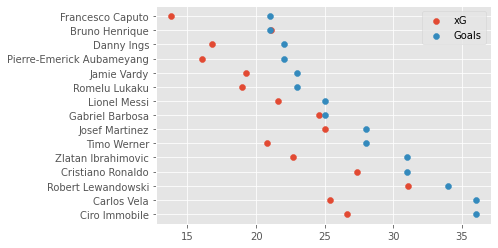

In [41]:
fig = plt.figure()
a = df.sort_values('Goals', ascending=False)[df.Year == 2019]
plt.scatter(a.xG[:15], a['Player Names'][:15], label = 'xG')
plt.scatter(a.Goals[:15], a['Player Names'][:15], label = 'Goals')
plt.legend()


Знайдемо найкращих гравців по відношенню очікуваних голів до забитих

In [42]:
df['xG/Goals'] = df.Goals / df.xG

In [43]:
df.sort_values('xG/Goals', ascending=False)[['xG/Goals', "Player Names"]].head(10)

,xG/Goals,Player Names
600,5.633803,James Ward-Prowse
574,3.750000,Daniel Caligiuri
340,3.010033,Pote
493,2.877698,Vaclav Cerny
545,2.797203,Gaetano Castrovilli
365,2.678571,Angel Gomes
533,2.654867,Federico Valverde
59,2.626263,Arjen Robben
521,2.614379,Portu
19,2.557545,Isco


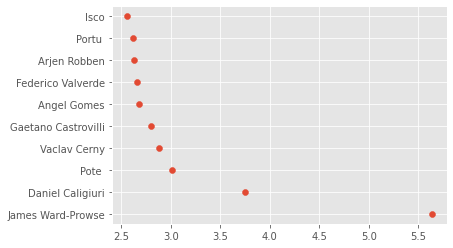

In [44]:
fig, ax = plt.subplots()
plt.scatter(df.sort_values('xG/Goals', ascending=False)['xG/Goals'][:10],
            df.sort_values('xG/Goals', ascending=False)['Player Names'][:10])

Порівняємо статистику Ліонеля Мессі та Криштіану Роналду

In [45]:
MR = df[['Player Names','Goals','Year']][(df['Player Names']=='Cristiano Ronaldo') | (df['Player Names']=='Lionel Messi')]

<AxesSubplot:xlabel='Player Names', ylabel='Goals'>

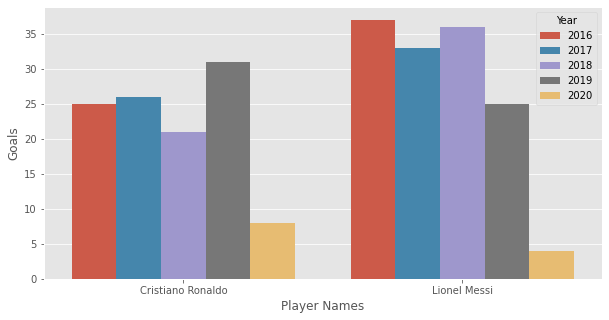

In [46]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Player Names', y = "Goals", hue = 'Year', data = MR)

# 3. Пошук найкращого гравця

Розглядаємо лише гравців, які зіграли більше 15 матчів(Приблизно пів сезону)

In [47]:
df = df[df.Year == 2018]#Беремо дані за 2018 рік
df = df[df['Matches_Played'] >= 15]

In [48]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,xG/Goals
180,Spain,La Liga,(RMA),Karim Benzema,35,1,3072,21,17.46,0.54,104,44,3.22,1.36,2018,1.202749
181,Spain,La Liga,(VAL),Maxi Gomez,33,2,3148,13,12.92,0.39,82,28,2.47,0.84,2018,1.006192
182,Spain,La Liga,(CEL),Iago Aspas,26,1,2369,20,12.47,0.50,69,32,2.77,1.28,2018,1.603849
183,Spain,La Liga,(GET),Jaime Mata,27,7,2569,14,12.44,0.46,59,25,2.18,0.92,2018,1.125402
184,Spain,La Liga,(BIL),Inaki Williams,36,2,3148,12,13.59,0.41,75,33,2.26,1.00,2018,0.883002


10 гравців, які забили найбільше голів

<AxesSubplot:xlabel='Goals', ylabel='Player Names'>

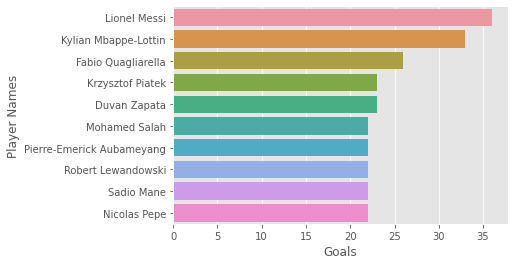

In [49]:
sns.barplot(x='Goals', y='Player Names', data= df.sort_values(by=['Goals'], ascending=False)[:10])

10 гравців з найкращим відношенням ударів у площину воріт, до всіх ударів

<AxesSubplot:xlabel='Accu', ylabel='Player Names'>

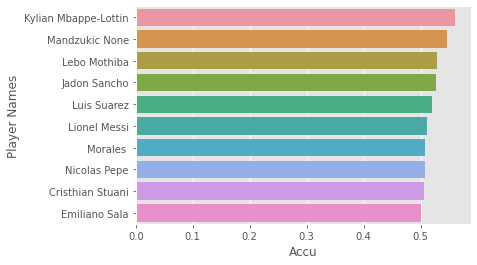

In [50]:
df['Accu'] = df['On Target Per Avg Match']/df['Shots Per Avg Match']
sns.barplot(x='Accu', y='Player Names', data= df.sort_values(by=['Accu'], ascending=False)[:10])

10 гравців, які мають найкращення відношення забитих голів до очікуваних

<AxesSubplot:xlabel='xG/Goals', ylabel='Player Names'>

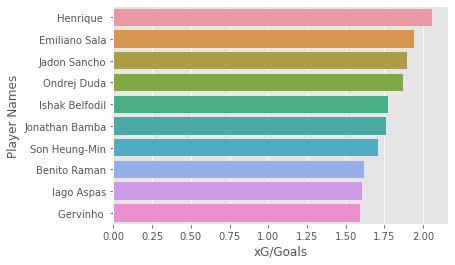

In [51]:
sns.barplot(x='xG/Goals', y='Player Names', data= df.sort_values(by=['xG/Goals'], ascending=False)[:10])

10 гравців, які створюють найбільше моментів

<AxesSubplot:xlabel='xG Per Avg Match', ylabel='Player Names'>

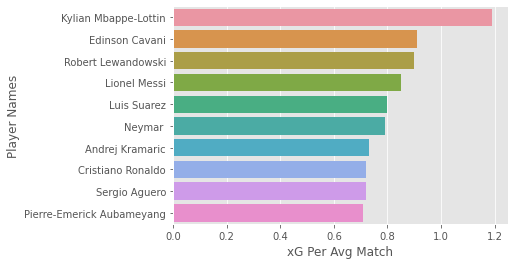

In [52]:
sns.barplot(x='xG Per Avg Match', y='Player Names', data= df.sort_values(by=['xG Per Avg Match'], ascending=False)[:10])


Як бачимо, найкращі результати показують Кіліан Мбаппе та Ліонель Мессі у 3 із 4 категорій, тому їх можна вважати найкращими нападкниками 2018 року.

# 4.Висновки

З 2018 по 2019 рік відбулися суттєві зміни до підходу команд до гри в національних лігах. В 2019 році збільшився вплив глибини складу на результати і зараз є необхідною умовою для успішного завершення сезону.

Наведений список найкращих бомбардирів 2019 року та їхні очікувані голи. Варто виділити Криштіано Роналду та Роберта Левандовскі, які мають схожі xG та голи серед топ форвардів.

Порівняна статистика Мессі та Роналду, яка вказує на те, що Мессі виступає стабільніше в національних лігах.

Серед кращих форвардів 2018 року варто виділити Мбаппе та Мессі, які мають найкращі показники.